
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/overview

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </foont>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Orange' size = 4 >Instructions</font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures

<li>Choose the number of layers your model will have</li>
<li>Add Embedding Layer for the text</li>
<li>Choose the types of layers your model will have: CNN, LSTM, GRU, RNN, Dense,...</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error,....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

</font>
<font color = 'Orange' size = 4 >
Report the parameters of the three best models in a table with the given columns:
</font>
<ul>
<font color = 'Orange'>
<li>Number of the model</li>
<li>Number of layers</li>
<li>Types of layers</li>
<li>Activation function for each layer</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)</li>
</ul>
<font color = 'Orange' size = 4 >Transformers based models</font>

<font color = 'Orange' size = 3 > Create a model that will use some of the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>

</ul>
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
test = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')

In [ ]:
X = train['text']
Y = train['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


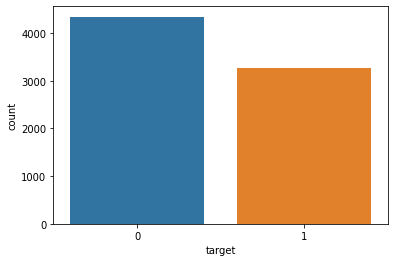

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 1 - Disaster
# 0 - Not a Disaster
sns.countplot(train['target'])

In [ ]:
from keras_preprocessing.text import Tokenizer

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size)

In [ ]:
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

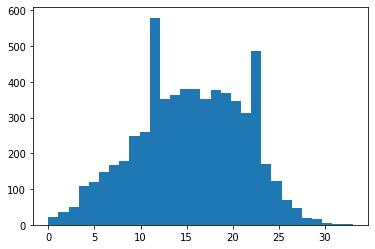

In [ ]:
numWords = [len(comment) for comment in X_train]
plt.hist(numWords, bins=30)
plt.show()

In [ ]:
from keras.preprocessing import sequence

max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [ ]:
models = []

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, RNN, GRU, LSTM, Flatten, Bidirectional, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=200, verbose=2, validation_split=0.2)

Epoch 1/5
25/25 - 11s - loss: 0.6610 - accuracy: 0.6002 - val_loss: 0.6140 - val_accuracy: 0.6642
Epoch 2/5
25/25 - 7s - loss: 0.4819 - accuracy: 0.7755 - val_loss: 0.4581 - val_accuracy: 0.7997
Epoch 3/5
25/25 - 7s - loss: 0.2660 - accuracy: 0.8990 - val_loss: 0.5111 - val_accuracy: 0.7906
Epoch 4/5
25/25 - 7s - loss: 0.1628 - accuracy: 0.9427 - val_loss: 0.5926 - val_accuracy: 0.7833
Epoch 5/5
25/25 - 7s - loss: 0.1090 - accuracy: 0.9616 - val_loss: 0.7255 - val_accuracy: 0.7578


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(Y_test, y_pred.round()))

0.7387661843107388


In [ ]:
models.append(["1", "5", "Embedding, Conv1D, MaxPooling, LSTM, Dense", "relu, sigmoid", "5", "200", "binary crossentropy", "adam", "0.739"])

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 150, input_length=X_train.shape[1]))
model.add(LSTM(32))
model.add(Dense(3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=8, batch_size=256, verbose=2, validation_split=0.2)

Epoch 1/8
20/20 - 6s - loss: 0.6878 - accuracy: 0.6129 - val_loss: 0.6796 - val_accuracy: 0.6240
Epoch 2/8
20/20 - 4s - loss: 0.6361 - accuracy: 0.7128 - val_loss: 0.6279 - val_accuracy: 0.7397
Epoch 3/8
20/20 - 4s - loss: 0.5643 - accuracy: 0.8069 - val_loss: 0.5796 - val_accuracy: 0.7709
Epoch 4/8
20/20 - 4s - loss: 0.5061 - accuracy: 0.8676 - val_loss: 0.5886 - val_accuracy: 0.7742
Epoch 5/8
20/20 - 4s - loss: 0.4679 - accuracy: 0.8929 - val_loss: 0.5889 - val_accuracy: 0.7800
Epoch 6/8
20/20 - 4s - loss: 0.4457 - accuracy: 0.9050 - val_loss: 0.6157 - val_accuracy: 0.7800
Epoch 7/8
20/20 - 4s - loss: 0.4270 - accuracy: 0.9163 - val_loss: 0.6768 - val_accuracy: 0.7660
Epoch 8/8
20/20 - 4s - loss: 0.4122 - accuracy: 0.9193 - val_loss: 0.6330 - val_accuracy: 0.7759


In [ ]:
y_pred = model.predict(X_test)
print(f1_score(Y_test, y_pred.round()))

0.7450657894736842


In [ ]:
models.append(["2", "6", "Embedding, LSTM, Dense, Dropout", "relu, sigmoid", "8", "256", "binary crossentropy", "adam", "0.745"])

In [ ]:
model = Sequential()


model.add(Embedding(vocab_size, 150, input_length=X_train.shape[1]))
model.add(GRU(16, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(16, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=200, verbose=2, validation_split=0.2)

Epoch 1/5
25/25 - 10s - loss: 0.6776 - accuracy: 0.5714 - val_loss: 0.6502 - val_accuracy: 0.6338
Epoch 2/5
25/25 - 7s - loss: 0.6138 - accuracy: 0.6611 - val_loss: 0.6091 - val_accuracy: 0.6642
Epoch 3/5
25/25 - 7s - loss: 0.4596 - accuracy: 0.7943 - val_loss: 0.5221 - val_accuracy: 0.7718
Epoch 4/5
25/25 - 7s - loss: 0.2627 - accuracy: 0.8994 - val_loss: 0.5872 - val_accuracy: 0.7685
Epoch 5/5
25/25 - 7s - loss: 0.1657 - accuracy: 0.9423 - val_loss: 0.7327 - val_accuracy: 0.7578


In [ ]:
y_pred = model.predict(X_test)
print(f1_score(Y_test, y_pred.round()))

0.7328125000000001


In [ ]:
models.append(["3", "7", "Embedding, GRU, Dense, Dropout", "linear, sigmoid", "6", "200", "binary crossentropy", "adam", "0.733"])

In [ ]:
import numpy as np

df = pd.DataFrame(np.array(models), columns=['Model No.', 'No. of layers', 'Types of layers', 'Activation functions', 'Epochs', 'Batch size', 'Loss function', 'Optimizer', 'F1 score'])

In [ ]:
df

,Model No.,No. of layers,Types of layers,Activation functions,Epochs,Batch size,Loss function,Optimizer,F1 score
0,1,5,"Embedding, Conv1D, MaxPooling, LSTM, Dense","relu, sigmoid",5,200,binary crossentropy,adam,0.739
1,2,6,"Embedding, LSTM, Dense, Dropout","relu, sigmoid",8,256,binary crossentropy,adam,0.745
2,3,7,"Embedding, GRU, Dense, Dropout","linear, sigmoid",6,200,binary crossentropy,adam,0.733


In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 9.1MB/s 
     |████████████████████████████████| 2.9MB 15.3MB/s 


In [ ]:
pip install pytorch_transformers 

     |████████████████████████████████| 184kB 8.8MB/s 
     |████████████████████████████████| 890kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 21.0MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 7.2MB 31.5MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=e87cc03bf93f90fe7ee9d52357c20cf86b93ceb0d0ab462d8111b704fff8777d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
  Created wheel for boto3: filename=boto3-1.16.48-py2.py3-none-any.whl size=128710 sha256=f4ad04f65a89af2b8b67332495509615f511513c2e4344f49c3f6e10d1deaaf3
  Stored in directory: /root/.cache/pip/wheels/29/5e/24/c13b555a2c0978dfc167c07c1f2f5e338cb44a5e8ea467ea42
Successfully built sacremoses boto3
ERROR: botocore 1.19.48 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll hav

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

In [ ]:
X = train['text']
Y = train['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
import torch

encoded_data_train = tokenizer.batch_encode_plus(X_train.values, add_special_tokens=True, return_attention_mask=True, pad_to_max_length=True, max_length=256, return_tensors='pt')
encoded_data_val = tokenizer.batch_encode_plus(X_test.values, add_special_tokens=True, return_attention_mask=True, pad_to_max_length=True, max_length=256, return_tensors='pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(Y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(Y_test.values)

In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
label_dict = {}
possible_labels = Y.unique()

for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label] = index

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = len(label_dict), output_attentions = False, output_hidden_states = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
batch_size = 4
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train, sampler = RandomSampler(dataset_train), batch_size=batch_size)
dataloader_val = DataLoader(dataset_val, sampler = RandomSampler(dataset_val), batch_size=batch_size)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr = 1e-5, eps = 1e-8)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 1
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps = len(dataloader_train)*epochs)

In [ ]:
def f1_score_func(preds, labels):
  preds_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
def accuracy_per_class(preds, labels):
  label_dict_inverse = {v: k for k, v in label_dict.items()}
  preds_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  for label in np.unique(labels_flat):
    y_preds = preds_flat[labels_flat==label]
    y_true = labels_flat[labels_flat==label]
    print(f'Class: {label_dict_inverse[label]}')
    print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cpu


In [ ]:
def evaluate(dataloader_val):
  model.eval()
  loss_val_total = 0
  predictions, true_vals = [], []
  for batch in tqdm(dataloader_val):
    batch = tuple(b.to(device) for b in batch)
    inputs = {'input_ids':      batch[0],
              'attention_mask': batch[1],
              'labels':         batch[2],
              }
    with torch.no_grad():
      outputs = model(**inputs)
    loss=outputs[0]
    logits=outputs[1]
    loss_val_total += loss.item()
    logits = logits.detach().cpu().numpy()
    label_ids = inputs['labels'].cpu().numpy()
    predictions.append(logits)
    true_vals.append(label_ids)
  loss_val_avg = loss_val_total/len(dataloader_val)
  predictions = np.concatenate(predictions, axis=0)
  true_vals = np.concatenate(true_vals, axis=0)
          
  return loss_val_avg, predictions, true_vals

In [ ]:
from tqdm.notebook import tqdm

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    #torch.save(model.state_dict(), f'Models/BERT_ft_Epoch{epoch}.model')
    

    
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    print(f'Validation loss: {val_loss}')
    print(f'F1 Score (weighted): {val_f1}')

Training loss: 0.5176197666526868



Validation loss: 0.5646368044298973
F1 Score (weighted): 0.8389351013047344



In [ ]:
torch.save(model, '/content/drive/MyDrive/model') 

In [ ]:
model = torch.load('/content/drive/MyDrive/model')
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
accuracy_per_class(predictions, true_vals) 

Class: 1
Accuracy:797/885

Class: 0
Accuracy:483/638



In [ ]:
f1_score_func(predictions, true_vals)

0.8389351013047344